# CSE 5243 - Introduction to Data Mining
## Homework 4: Clustering
- Semester: Spring 2021
- Instructor: Davis Buenger
- Section: Tuesday/Thursday 5:30PM
- Student Name: Xidan Kou
- Student Email: kou.55@osu.edu
- Student ID: 500339314

***

**Instructions and Helpful Hints:**
- Consider putting all of your "discussion" text in markdown cells, not inline with code. That gives you more control over formatting. Markdown cheat sheet: https://www.markdownguide.org/cheat-sheet
- Explain what you are doing, and why.  Explain what you found out or learned.
- *Make sure you run your entire workbook before handing it in, so the output cells are populated.*
- Follow the Section structure as much as possible - put your content where it is requested, so we can find your answers.
- If you have questions on expectations or need clarification or guidance, please ask.  Post to Piazza if it is a general question, so everyone benefits.

Improt Functions

In [319]:
import numpy as np
import seaborn as sns
import pandas as pd
import time
import math

from sklearn.cluster import KMeans

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

from matplotlib import pyplot as plt


Import dataset and elimite the index column

In [352]:
small = pd.read_csv("small_Xydf.csv",index_col = 0)
large1 = pd.read_csv("large1_Xydf.csv", index_col = 0)
large2 = pd.read_csv("large2_Xydf.csv", index_col = 0)

Split dataset into X values and Y value, and standardiza X value datasets

Because we will use K means method, which prefer standardized data. We will standardize data first, so that the  dataset have a mean of 0 and standard deviation of 1

In [353]:
scaler = StandardScaler()

scaler.fit(large2.iloc[:,:2])
large2.iloc[:,:2] = pd.DataFrame(scaler.transform(large2.iloc[:,:2]))

scaler.fit(large1.iloc[:,:2])
large1.iloc[:,:2] = scaler.transform(large1.iloc[:,:2])

scaler.fit(small.iloc[:,:2])
small.iloc[:,:2] = scaler.transform(small.iloc[:,:2])

In [354]:
small_x = small.iloc[:,:2]
small_y = small.iloc[:,2]

large1_x = large1.iloc[:,:2]
large1_y = large1.iloc[:,2]

large2_x = large2.iloc[:,:2]
large2_y = large2.iloc[:,2]

***
# Section: Overview
- Insert a short description of the scope of this exercise, any supporting information, etc.
***

This exercise is to learn different clustering methods, especially for the k means method.

***
# Section: Setup
- Add any needed imports, helper functions, etc., here.
***

In [355]:
#calculate the square of eclud distence

def num_clusters(data_y):
    largest = 0
    for i in range(len(data_y)):
        if data_y[i] > largest:
            largest = data_y[i]
    return largest + 1


# Print centroids for each Cluster
def centroids(data):
    data_y = data.iloc[:,2]
    centroids = []
    n = num_clusters(data_y)
    for i in range(n):
        subsets = data[data_y == i].iloc[:,:2]
        centroids.append(np.array(np.mean(subsets)))  
    centroids = np.array(centroids)
    return centroids


def dist(A,B):
    return np.sum(np.power(A-B,2))

#function of SSE:
def sse(data, cluster_list, center_list):
    sse = 0
    for i in range(len(data)):
        cluster_num = cluster_list[i]
        sse += dist(data.iloc[i,:], center_list[cluster_num])
    return sse

#function of BSS
def bss(cluster_list,center_list,center_of_data):
    bss = 0
    for i in range(center_list.shape[0]):
        bss += len(cluster_list[cluster_list == i]) * dist(center_list[i],center_of_data)
    return bss

#get the cluster list,center list
def cluster(data):
    cluster_list = data['y']
    center_list = []

    for i in set(cluster_list):
        subdata = data[data['y'] == i].iloc[:,:2]
        center_list.append(np.array(np.mean(subdata)))
    center_list = np.array(center_list)
    return cluster_list, center_list

In [340]:
cluster(small)

(0     0
 1     1
 2     1
 3     1
 4     2
      ..
 95    2
 96    2
 97    0
 98    2
 99    0
 Name: y, Length: 100, dtype: int64,
 array([[ 1.13301099,  1.22767086],
        [-1.08753316, -0.23071714],
        [-0.0798115 , -1.03415586]]))

***
# Section: 1 - Evaluate the **K-Means** Algorithm on the **Small** Dataset
***

***
## Section: 1.1 - Calculate True Cluster Measures
- Given that you know the true clusters (from column y in the original data), compute the true within-cluster WSS and the between-cluster BSS.
***

In [341]:
cluster_list,center_list = cluster(small)
center_of_data = np.array(np.mean(small_x))
print('within cluster error(sse) for small dataset:',sse(small_x,cluster_list,center_list))
print('between cluster error(bss) for small dataset:', bss(cluster_list,center_list,center_of_data))

within cluster error(sse) for small dataset: 28.820121234058107
between cluster error(bss) for small dataset: 171.1798787659419


***
## Section: 1.2 - Configure and Run the SciKitLearn K-Means Algorithm
- Explain all configuration parameter values you chose, and why you chose them.
- Run your algorithm for K=2, 3, 4.
- For each run, compute the within-cluster WSS and the between-cluster BSS, and compute the running time.
***

Parameters explanation:
   - 'init = "k-means++"' : using k-means++ as the method to choose initial centroid (Choosing k-means++ as the method because it will generates more accurate output than other methods, though a little time consuming)
   - 'n_clusters = (2/3/4)': number of clusters equals to 2/3/4
   - 'n_init = 5' : sets the number of initializations to perform (Choosing 5 because we assume with 5 times, the centroids will remain roughly the same)

For K = 2

In [342]:
kmeans = KMeans(init = "k-means++", n_clusters = 2,n_init = 5)
kmeans.fit(small_x)

cluster_list = kmeans.labels_
center_list = kmeans.cluster_centers_
center_of_data = np.array(np.mean(small_x))

print('within cluster error(sse) for small dataset using Kmeans:',sse(small_x,cluster_list,center_list))
print('between cluster error(bss) for small dataset using Kmeans:', bss(cluster_list,center_list,center_of_data))

print('\n')
print('runtime to compute sse:')
%timeit sse(small_x,cluster_list,center_list)


print('runtime to compute bss:')
%timeit bss(cluster_list,center_list,center_of_data)

within cluster error(sse) for small dataset using Kmeans: 56.22689716445493
between cluster error(bss) for small dataset using Kmeans: 143.77310283554505


runtime to compute sse:
47.5 ms ± 3.97 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
runtime to compute bss:
The slowest run took 4.09 times longer than the fastest. This could mean that an intermediate result is being cached.
38.3 µs ± 18.6 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


For K = 3

In [343]:
kmeans = KMeans(init = "k-means++", n_clusters = 3,n_init = 5)
kmeans.fit(small_x)

cluster_list = kmeans.labels_
center_list = kmeans.cluster_centers_
center_of_data = np.array(np.mean(small_x))

print('within cluster error(sse) for small dataset using Kmeans:',sse(small_x,cluster_list,center_list))
print('between cluster error(bss) for small dataset using Kmeans:', bss(cluster_list,center_list,center_of_data))

print('\n')
print('runtime to compute sse:')
%timeit sse(small_x,cluster_list,center_list)


print('runtime to compute bss:')
%timeit bss(cluster_list,center_list,center_of_data)

within cluster error(sse) for small dataset using Kmeans: 28.360585463021195
between cluster error(bss) for small dataset using Kmeans: 171.6394145369788


runtime to compute sse:
92.8 ms ± 15.1 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
runtime to compute bss:
37.5 µs ± 5.79 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


For K = 4

In [344]:
kmeans = KMeans(init = "k-means++", n_clusters = 4,n_init = 5)
kmeans.fit(small_x)

cluster_list = kmeans.labels_
center_list = kmeans.cluster_centers_
center_of_data = np.array(np.mean(small_x))

print('within cluster error(sse) for small dataset using Kmeans:',sse(small_x,cluster_list,center_list))
print('between cluster error(bss) for small dataset using Kmeans:', bss(cluster_list,center_list,center_of_data))

print('\n')
print('runtime to compute sse:')
%timeit sse(small_x,cluster_list,center_list)


print('runtime to compute bss:')
%timeit bss(cluster_list,center_list,center_of_data)

within cluster error(sse) for small dataset using Kmeans: 23.726943285959646
between cluster error(bss) for small dataset using Kmeans: 176.27305671404037


runtime to compute sse:
50 ms ± 4.96 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
runtime to compute bss:
38.5 µs ± 2.35 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


***
## Section: 1.3 - For the K=3 Case Above:
- Create a scatterplot, overlaying the true cluster with the cluster produced by your algorithm.
- Create a cross tabulation matrix (i.e., confusion matrix) comparing the true and assigned clusters, and the basic measures (precision, recall, F1, accuracy, etc.).
***

Scatter Plot:

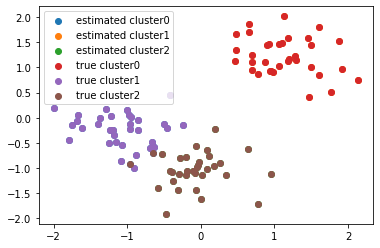

In [345]:
kmeans = KMeans(init = "k-means++", n_clusters = 3,n_init = 5)
kmeans.fit(small_x)

f, ax = plt.subplots(1)
label = kmeans.labels_
for i in np.unique(label):
    mask = label == i
    plt.scatter(small[mask]['X0'], small[mask]['X1'],label= "estimated cluster" + str(i))

for i in np.unique(small_y):
    mask = small_y == i
    plt.scatter(small[mask]['X0'], small[mask]['X1'],label= "true cluster" + str(i))
    
ax.legend()

In [346]:
kmeans_y = kmeans.predict(small_x)
print(confusion_matrix(small_y, kmeans_y))
print(classification_report(small_y, kmeans_y))

[[ 0 34  0]
 [33  0  0]
 [ 2  0 31]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        34
           1       0.00      0.00      0.00        33
           2       1.00      0.94      0.97        33

    accuracy                           0.31       100
   macro avg       0.33      0.31      0.32       100
weighted avg       0.33      0.31      0.32       100



We can tell from the plot that the estimated clusters are completely overlaped with true clusters

***
## Section: 1.4 - Record Your Observations
- What do you observe or conclude from these experiments?
- Which is your “preferred” clustering (K value in particular), and why?
- Support this with statistics and/or graphs.
***

***
# Section: 2 - Evaluate the **K-Means** Algorithm on the **Large1** Dataset
***

***
## Section: 2.1 - Calculate True Cluster Measures
- Given that you know the true clusters (from column y in the original data), compute the true within-cluster WSS and the between-cluster BSS.
***

In [356]:
cluster_list,center_list = cluster(large1)
center_of_data = np.array(np.mean(large1_x))
print('within cluster error(sse) for Large1 dataset:',sse(large1_x,cluster_list,center_list))
print('between cluster error(bss) for Large1 dataset:', bss(cluster_list,center_list,center_of_data))

within cluster error(sse) for Large1 dataset: 261.84411329550807
between cluster error(bss) for Large1 dataset: 3738.1558867044923


***
## Section: 2.2 - Configure and Run the SciKitLearn K-Means Algorithm
- Explain all configuration parameter values you chose, and why you chose them.
- Run your algorithm for K=6, 8, 10.
- For each run, compute the within-cluster WSS and the between-cluster BSS, and compute the running time.
***

Parameters explanation:
   - 'init = "k-means++"' : using k-means++ as the method to choose initial centroid (Choosing k-means++ as the method because it will generates more accurate output than other methods, though a little time consuming)
   - 'n_clusters = (6/8/10)': number of clusters equals to 2/3/4
   - 'n_init = 10' : sets the number of initializations to perform (Choosing 10 because we assume with 10 times, the centroids will remain roughly the same)

For K = 6

In [357]:
kmeans = KMeans(init = "k-means++", n_clusters = 6,n_init = 10)
kmeans.fit(large1_x)

cluster_list = kmeans.labels_
center_list = kmeans.cluster_centers_
center_of_data = np.array(np.mean(large1_x))

print('within cluster error(sse) for Large1 dataset using Kmeans:',sse(large1_x,cluster_list,center_list))
print('between cluster error(bss) for Large1 dataset using Kmeans:', bss(cluster_list,center_list,center_of_data))

print('\n')
print('runtime to compute sse:')
%timeit sse(large1_x,cluster_list,center_list)


print('runtime to compute bss:')
%timeit bss(cluster_list,center_list,center_of_data)

within cluster error(sse) for Large1 dataset using Kmeans: 334.7094153000583
between cluster error(bss) for Large1 dataset using Kmeans: 3665.2905846999433


runtime to compute sse:
1.02 s ± 103 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
runtime to compute bss:
127 µs ± 19.5 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


For K = 8

In [360]:
kmeans = KMeans(init = "k-means++", n_clusters = 8,n_init = 10)
kmeans.fit(large1_x)

cluster_list = kmeans.labels_
center_list = kmeans.cluster_centers_
center_of_data = np.array(np.mean(large1_x))

print('within cluster error(sse) for Large1 dataset using Kmeans:',sse(large1_x,cluster_list,center_list))
print('between cluster error(bss) for Large1 dataset using Kmeans:', bss(cluster_list,center_list,center_of_data))

print('\n')
print('runtime to compute sse:')
%timeit sse(large1_x,cluster_list,center_list)


print('runtime to compute bss:')
%timeit bss(cluster_list,center_list,center_of_data)

within cluster error(sse) for Large1 dataset using Kmeans: 227.77583312456395
between cluster error(bss) for Large1 dataset using Kmeans: 3772.2241668754364


runtime to compute sse:
1 s ± 71.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
runtime to compute bss:
169 µs ± 23.1 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


For K = 10

In [361]:
kmeans = KMeans(init = "k-means++", n_clusters = 10,n_init = 10)
kmeans.fit(large1_x)

cluster_list = kmeans.labels_
center_list = kmeans.cluster_centers_
center_of_data = np.array(np.mean(large1_x))

print('within cluster error(sse) for Large1 dataset using Kmeans:',sse(large1_x,cluster_list,center_list))
print('between cluster error(bss) for Large1 dataset using Kmeans:', bss(cluster_list,center_list,center_of_data))

print('\n')
print('runtime to compute sse:')
%timeit sse(large1_x,cluster_list,center_list)


print('runtime to compute bss:')
%timeit bss(cluster_list,center_list,center_of_data)

within cluster error(sse) for Large1 dataset using Kmeans: 195.60161946469827
between cluster error(bss) for Large1 dataset using Kmeans: 3804.7063652427582


runtime to compute sse:
1.7 s ± 819 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
runtime to compute bss:
180 µs ± 30.3 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


***
## Section: 2.3 - For the K=8 Case Above:
- Create a scatterplot, overlaying the true cluster with the cluster produced by your algorithm.
- Create a cross tabulation matrix (i.e., confusion matrix) comparing the true and assigned clusters, and the basic measures (precision, recall, F1, accuracy, etc.).
***

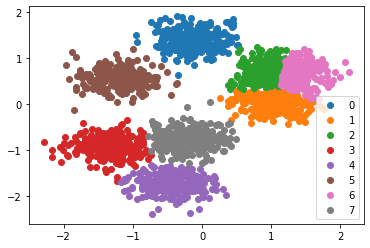

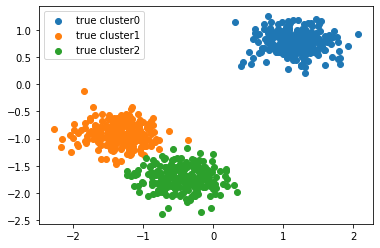

In [362]:
kmeans = KMeans(init = "k-means++", n_clusters = 8,n_init = 10)
kmeans.fit(large1_x)

f, ax = plt.subplots(1)
label = kmeans.labels_
for i in np.unique(label):
    mask = label == i
    plt.scatter(large1[mask]['X0'], large1[mask]['X1'],label=i)
ax.legend()

f, ax = plt.subplots(1)
for i in np.unique(small_y):
    mask = large1_y == i
    plt.scatter(large1[mask]['X0'], large1[mask]['X1'],label= "true cluster" + str(i))
ax.legend()

- The first image was plotted using the Kmeans clusing method with K = 8.
- The second image was plotted over the orininal/true clustering

In [363]:
kmeans_y = kmeans.predict(large1_x)
print(confusion_matrix(large1_y, kmeans_y))
print(classification_report(large1_y, kmeans_y))

[[  1   2 131   0   0   0 116   0]
 [  0   0   0 247   0   1   0   2]
 [  0   0   0   3 243   0   0   4]
 [  0   1   0  11   0   0   0 238]
 [  0 231   5   0   0   0  13   1]
 [  0  13 112   0   0   0 125   0]
 [246   0   3   0   0   1   0   0]
 [  2   0   0   0   0 248   0   0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       250
           1       0.00      0.00      0.00       250
           2       0.00      0.00      0.00       250
           3       0.04      0.04      0.04       250
           4       0.00      0.00      0.00       250
           5       0.00      0.00      0.00       250
           6       0.00      0.00      0.00       250
           7       0.00      0.00      0.00       250

    accuracy                           0.01      2000
   macro avg       0.01      0.01      0.01      2000
weighted avg       0.01      0.01      0.01      2000



***
## Section: 2.4 - Record Your Observations
- What do you observe or conclude from these experiments?
- Which is your “preferred” clustering (K value in particular), and why?
- Support this with statistics and/or graphs.
***

Based on the scatter plot above (from K = 8), we can tell the that K = 8 overfits the data. 
So now we try to evaluate on smaller K, where K = 6.

In [ ]:
# We first plot the scatter plot on K = 6
kmeans = KMeans(init = "k-means++", n_clusters = 6,n_init = 10)
kmeans.fit(large1_x)

f, ax = plt.subplots(1)
label = kmeans.labels_
for i in np.unique(label):
    mask = label == i
    plt.scatter(large1[mask]['X0'], large1[mask]['X1'],label=i)
ax.legend()

f, ax = plt.subplots(1)
for i in np.unique(large1_y):
    mask = large1_y == i
    plt.scatter(large1[mask]['X0'], large1[mask]['X1'],label= "true cluster" + str(i))
ax.legend()

In [ ]:
kmeans_y = kmeans.predict(large1_x)
print(confusion_matrix(large1_y, kmeans_y))
print(classification_report(large1_y, kmeans_y))

***
# Section: 3 - Evaluate the **K-Means** Algorithm on the **Large2** Dataset
***

***
## Section: 3.1 - Calculate True Cluster Measures
- Given that you know the true clusters (from column y in the original data), compute the true within-cluster WSS and the between-cluster BSS.
***

In [ ]:
cluster_list,center_list = cluster(large2)
center_of_data = np.array(np.mean(large2_x))
print('within cluster error(sse) for Large1 dataset:',sse(large2_x,cluster_list,center_list))
print('between cluster error(bss) for Large1 dataset:', bss(cluster_list,center_list,center_of_data))

***
## Section: 3.2 - Configure and Run the SciKitLearn K-Means Algorithm
- Explain all configuration parameter values you chose, and why you chose them.
- Run your algorithm for K=2, 3, 4.
- For each run, compute the within-cluster WSS and the between-cluster BSS,  and compute the running time.
***

Parameters explanation:
   - 'init = "k-means++"' : using k-means++ as the method to choose initial centroid (Choosing k-means++ as the method because it will generates more accurate output than other methods, though a little time consuming)
   - 'n_clusters = (2/3/4)': number of clusters equals to 2/3/4
   - 'n_init = 5' : sets the number of initializations to perform (Choosing 10 because we assume with 5 times, the centroids will remain roughly the same)

For K = 2

In [350]:
kmeans = KMeans(init = "k-means++", n_clusters = 2,n_init = 10)
kmeans.fit(large2_x)

cluster_list = kmeans.labels_
center_list = kmeans.cluster_centers_
center_of_data = np.array(np.mean(large2_x))

print('within cluster error(sse) for Large1 dataset using Kmeans:',sse(large1_x,cluster_list,center_list))
print('between cluster error(bss) for Large1 dataset using Kmeans:', bss(cluster_list,center_list,center_of_data))

print('\n')
print('runtime to compute sse:')
%timeit sse(large2_x,cluster_list,center_list)


print('runtime to compute bss:')
%timeit bss(cluster_list,center_list,center_of_data)

AttributeError: 'numpy.ndarray' object has no attribute 'iloc'

For K = 3

In [ ]:
kmeans = KMeans(init = "k-means++", n_clusters = 3,n_init = 10)
kmeans.fit(large2_x)

cluster_list = kmeans.labels_
center_list = kmeans.cluster_centers_
center_of_data = np.array(np.mean(large2_x))

print('within cluster error(sse) for Large1 dataset using Kmeans:',sse(large1_x,cluster_list,center_list))
print('between cluster error(bss) for Large1 dataset using Kmeans:', bss(cluster_list,center_list,center_of_data))

print('\n')
print('runtime to compute sse:')
%timeit sse(large2_x,cluster_list,center_list)


print('runtime to compute bss:')
%timeit bss(cluster_list,center_list,center_of_data)

For K = 4 

In [ ]:
kmeans = KMeans(init = "k-means++", n_clusters = 4,n_init = 10)
kmeans.fit(large2_x)

cluster_list = kmeans.labels_
center_list = kmeans.cluster_centers_
center_of_data = np.array(np.mean(large2_x))

print('within cluster error(sse) for Large1 dataset using Kmeans:',sse(large1_x,cluster_list,center_list))
print('between cluster error(bss) for Large1 dataset using Kmeans:', bss(cluster_list,center_list,center_of_data))

print('\n')
print('runtime to compute sse:')
%timeit sse(large2_x,cluster_list,center_list)


print('runtime to compute bss:')
%timeit bss(cluster_list,center_list,center_of_data)

***
## Section: 3.3 - For the K=2 Case Above:
- Create a scatterplot, overlaying the true cluster with the cluster produced by your algorithm.
- Create a cross tabulation matrix (i.e., confusion matrix) comparing the true and assigned clusters, and the basic measures (precision, recall, F1, accuracy, etc.).
***

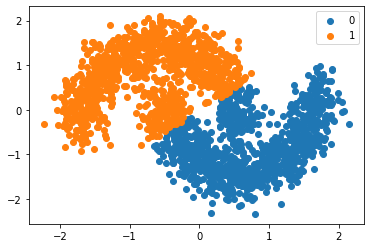

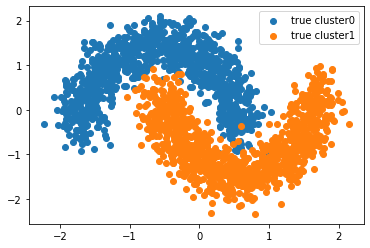

In [348]:
kmeans = KMeans(init = "k-means++", n_clusters = 2,n_init = 10)
kmeans.fit(large2_x)

f, ax = plt.subplots(1)
label = kmeans.labels_
for i in np.unique(label):
    mask = label == i
    plt.scatter(large2[mask]['X0'], large2[mask]['X1'],label=i)
ax.legend()

f, ax = plt.subplots(1)
for i in np.unique(large2_y):
    mask = large2_y == i
    plt.scatter(large2[mask]['X0'], large2[mask]['X1'],label= "true cluster" + str(i))
ax.legend()

In [349]:
kmeans_y = kmeans.predict(large2_x)
print(confusion_matrix(large2_y, kmeans_y))
print(classification_report(large2_y, kmeans_y))

[[144 856]
 [837 163]]
              precision    recall  f1-score   support

           0       0.15      0.14      0.15      1000
           1       0.16      0.16      0.16      1000

    accuracy                           0.15      2000
   macro avg       0.15      0.15      0.15      2000
weighted avg       0.15      0.15      0.15      2000



***
## Section: 3.4 - Record Your Observations
- What do you observe or conclude from these experiments?
- Which is your “preferred” clustering (K value in particular), and why?
- Support this with statistics and/or graphs.
***

***
# Section: 4 - Evaluate a **Second** Clustering Algorithm on the **Large2** Dataset
***

***
## Section: 4.1 - Choose a Clustering Algorithm from the SciKitLearn Library  
- Explain why you chose it.
***

I choose the Agglomerative Clustering from Hierachival Clustering because:
- It is more flexible than K means method, since we don't need to specify the number of clusters.

***
## Section: 4.2 - Configure and Run the Algorithm
- Do this for (at least) two variations of the configuration settings (if any).  Explain all configuration parameter values you chose, and why you chose them.
- For Each Run:
1. Compute the within-cluster WSS and the between-cluster BSS, and compute the running time.
2. Create a scatterplot, overlaying the true cluster with the cluster produced by your algorithm.
3. Create a cross tabulation matrix (i.e., confusion matrix) comparing the true and assigned clusters, and the basic measures (precision, recall, F1, accuracy, etc.).
***

First take a look at data with true clusters

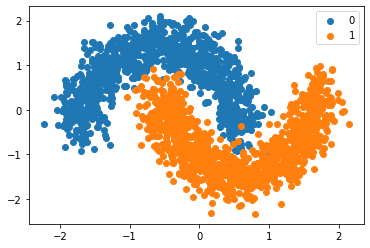

In [166]:
f, ax = plt.subplots(1)
for i in np.unique(large2_y):
    mask = large2_y == i
    plt.scatter(large2_x[mask]['X0'], large2_x[mask]['X1'], label=i)
        
ax.legend()

In [122]:
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering

We first define two functions to help with further plots

In [186]:
# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(large2_x)

In [187]:
def plot_at_thresh(thr,link='single'):
    model2 = AgglomerativeClustering( distance_threshold=thr,n_clusters=None,linkage =link)
    model2 = model2.fit(large2_x)
    labs = model2.labels_
    
    f, ax = plt.subplots(1)
    for i in np.unique(labs):
        mask = labs == i
        plt.scatter(large2_x[mask]['X0'], large2_x[mask]['X1'], label=i)
        
    ax.legend()

In [188]:
def crosstab_at_thresh(thr,link='single'):
    model2 = AgglomerativeClustering( distance_threshold=thr,n_clusters=None,linkage =link)
    model2 = model2.fit(large2_x)
    labs = model2.labels_
    return(pd.crosstab(large2_y,labs))

***
## Section: 4.3 - Record Your Observations
- What do you observe or conclude from these experiments?
- Which is your “preferred” clustering (configuration settings, if any), and why?
- Support this with statistics and/or graphs.
***

Randomly choose thresholds and linkage criteria to first look at the graph

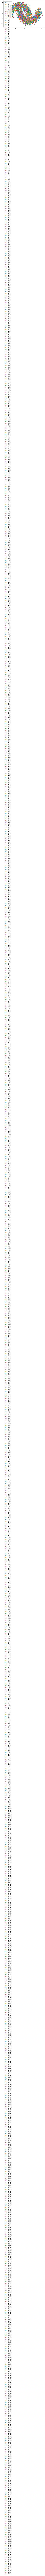

In [192]:
plot_at_thresh(0.03,'single')

This is non-elliptical shape, using "Min" as defining distance would be helpful with non-eliptical shape

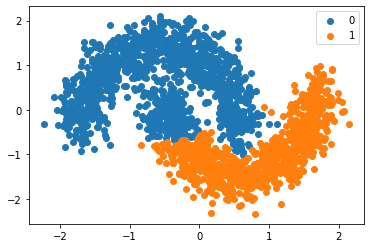

In [190]:
plot_at_thresh(2,'average')

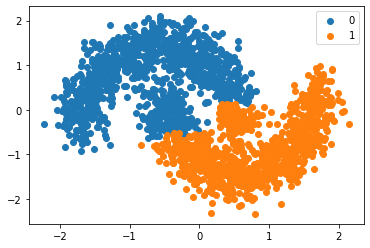

In [191]:
plot_at_thresh(30,'ward')

Using '2' as the distance_threshold because this value neither produced too much clusterings nor just 1 clusters

***
# Section: 5 - Evaluate a **Third** Clustering Algorithm on the **Large2** Dataset
***

***
## Section: 5.1 - Choose a Clustering Algorithm from the SciKitLearn Library  
- Explain why you chose it.
***

I choose DBSCAN method, because it can handle clusters of different shapes 

***
## Section: 5.2 - Configure and Run the Algorithm
- Do this for (at least) two variations of the configuration settings (if any).  Explain all configuration parameter values you chose, and why you chose them.
- For Each Run:
1. Compute the within-cluster WSS and the between-cluster BSS, and compute the running time.
2. Create a scatterplot, overlaying the true cluster with the cluster produced by your algorithm.
3. Create a cross tabulation matrix (i.e., confusion matrix) comparing the true and assigned clusters, and the basic measures (precision, recall, F1, accuracy, etc.).
***

Since it is the same dataset(Large), it was created in the above section

***
## Section: 5.3 - Record Your Observations
- What do you observe or conclude from these experiments?
- Which is your “preferred” clustering (configuration settings, if any), and why?
- Support this with statistics and/or graphs.
***

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
from scipy.spatial import distance_matrix

In [197]:
X_df  = pd.DataFrame(large2_x)
Dist_mat  =  pd.DataFrame(distance_matrix(X_df.values, X_df.values), index=X_df.index, columns=X_df.index)
Dist_mat = pd.concat([Dist_mat[col].sort_values().reset_index(drop=True) for col in Dist_mat], axis=1, ignore_index=True)

In [198]:
Dist_mat.head()

,0,1,2,3,4,5,6,7,8,9,...,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.027929,0.025411,0.027308,0.018869,0.029145,0.035507,0.063129,0.062099,0.123862,0.034468,...,0.019680,0.022792,0.018933,0.034438,0.032067,0.028829,0.043352,0.219338,0.016928,0.047003
2,0.062524,0.032209,0.041791,0.028174,0.030442,0.038404,0.093370,0.084301,0.143824,0.058376,...,0.032769,0.030086,0.067254,0.040889,0.048062,0.052616,0.084908,0.249796,0.033590,0.063947
3,0.066566,0.078237,0.041934,0.037606,0.036525,0.044070,0.106597,0.107121,0.163026,0.065115,...,0.050694,0.036165,0.077043,0.042087,0.048877,0.053161,0.101333,0.289013,0.065872,0.086892
4,0.073468,0.083641,0.060053,0.057954,0.038595,0.048547,0.161207,0.118899,0.188484,0.081951,...,0.062740,0.049685,0.079267,0.062329,0.066104,0.054336,0.113463,0.300192,0.121158,0.090975


Above is the distance matrix, where columns are each points, and rows are the distances of that point from the closest to the farest. 

Choose 4th number of nearest neighbors

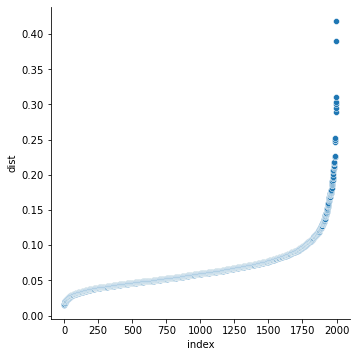

In [199]:
pt_3 = Dist_mat.iloc[3,].sort_values().tolist()
df_3 = pd.DataFrame({'dist':pt_3,
                   'index':pd.Series(range(len(pt_3)))}) 
sns.pairplot(x_vars=['index'], y_vars=['dist'], data=df_3,  height=5)

The elbow appears around distance 0.13, so we choose 0.13 as eps

In [213]:
db = DBSCAN(eps=0.13, min_samples=15).fit(large2_x)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(large2_x, labels))

Estimated number of clusters: 5
Estimated number of noise points: 449
Silhouette Coefficient: -0.090


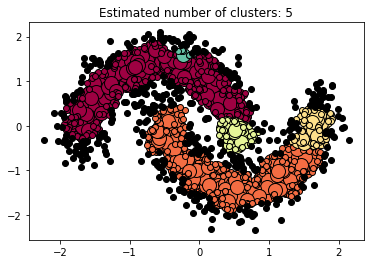

In [212]:
# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0,0,1]

    class_member_mask = (labels == k)

    xy = large2_x[class_member_mask & core_samples_mask]
    plt.plot(xy[:]['X0'], xy[:]['X1'], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = large2_x[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:]['X0'], xy[:]['X1'], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

Choose 3rd nearest neighbors.

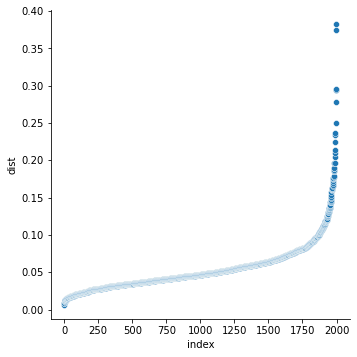

In [220]:
pt_2 = Dist_mat.iloc[2,].sort_values().tolist()
df_2 = pd.DataFrame({'dist':pt_2,
                   'index':pd.Series(range(len(pt_2)))}) 
sns.pairplot(x_vars=['index'], y_vars=['dist'], data=df_2,  height=5)

The elbow appears around distance = 0.10, so we choose 0.10 as the eps.

In [221]:
# Compute DBSCAN
db = DBSCAN(eps=0.10, min_samples=15).fit(large2_x)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(large2_x, labels))

Estimated number of clusters: 30
Estimated number of noise points: 1275
Silhouette Coefficient: -0.334


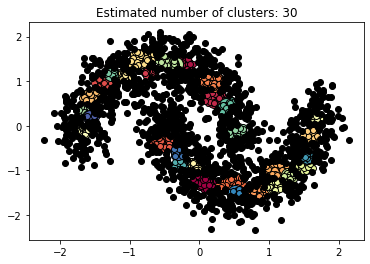

In [222]:
# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = large2_x[class_member_mask & core_samples_mask]
    plt.plot(xy[:]['X0'], xy[:]['X1'], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = large2_x[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:]['X0'], xy[:]['X1'], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

***
## Section: 6.1 - Compare Their Performance
- What was their relative performance (quality and timing), and their performance versus the true clustering?
- What characteristics of the data might impact the clustering algorithms' performance?
***

***
## Section: 6.2 - Choose a Best Clustering Algorithm
- Choose one of the three clustering algorithm as best and explain why.
***

The best Classifier is the DBSCAN method with eps = 0.13 and Minpts = 15, because it fits the large2 data well.

***
# Section: 7 - Conclusions
- Write a paragraph on what you discovered or learned from this homework.
***

I discovered that different methods will be suitable for specific type/shape of data.

***
### END-OF-SUBMISSION
***